# import data

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.sample(4)

,Survived,Age,Fare
432,1,42.0,26.0000
640,0,20.0,7.8542
46,0,NaN,15.5000
758,0,34.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

# train test split

In [122]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [125]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


## Randomness in numerical column

In [126]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [127]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [129]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([38.  , 18.  , 28.  , 43.  , 27.  , 15.  , 24.  , 51.  , 27.  ,
       44.  , 19.  , 22.  ,  7.  , 20.  , 26.  , 16.  , 60.  , 31.  ,
        4.  , 28.5 , 22.  , 18.  , 14.  , 47.  , 36.  , 16.  , 39.  ,
       61.  , 46.  , 43.  , 32.  ,  3.  , 22.  ,  0.83, 27.  , 36.  ,
       58.  , 30.5 , 25.  , 30.  , 17.  , 29.  ,  2.  , 30.  , 64.  ,
       21.  , 24.  , 17.  , 24.  , 21.  ,  5.  , 52.  , 31.  , 35.  ,
       18.  , 71.  ,  2.  , 22.  , 24.  , 24.  , 27.  , 23.  , 23.  ,
       36.  , 51.  , 21.  , 33.  , 16.  , 29.  , 56.  , 16.  , 26.  ,
       65.  , 33.  , 51.  , 28.  , 19.  , 29.  , 30.  ,  9.  ,  6.  ,
       31.  , 22.  , 27.  , 58.  , 28.  , 59.  , 20.  , 24.  , 39.  ,
       50.  , 16.  , 25.  , 30.  , 39.  , 19.  , 25.  , 25.  , 52.  ,
       18.  , 31.  , 30.  , 21.  , 42.  , 35.  , 24.  , 25.  , 35.  ,
       47.  , 23.5 , 26.  , 19.  , 40.  , 28.  , 26.  , 31.  , 33.  ,
       63.  , 24.  , 22.  , 36.  , 41.  , 29.  , 20.  , 42.  , 36.  ,
       50.  , 34.  ,

In [130]:
X_train['Age'].isnull().sum()

np.int64(148)

In [131]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,19.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


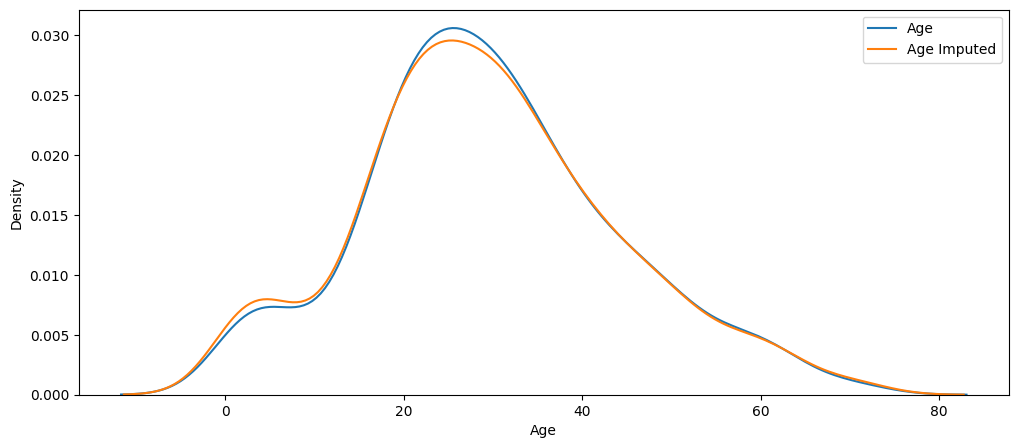

In [132]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)
sns.kdeplot(X_train['Age'], ax=ax1, label='Age')
sns.kdeplot(X_train['Age_imputed'], ax=ax1, label='Age Imputed')

ax1.legend(loc='best')
plt.show()

In [133]:
X_train.var()

Age             204.349513
Fare           2368.246832
Age_imputed     212.745140
dtype: float64

In [134]:
X_train.cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,63.836049
Age_imputed,204.349513,63.836049,212.745140


<Axes: >

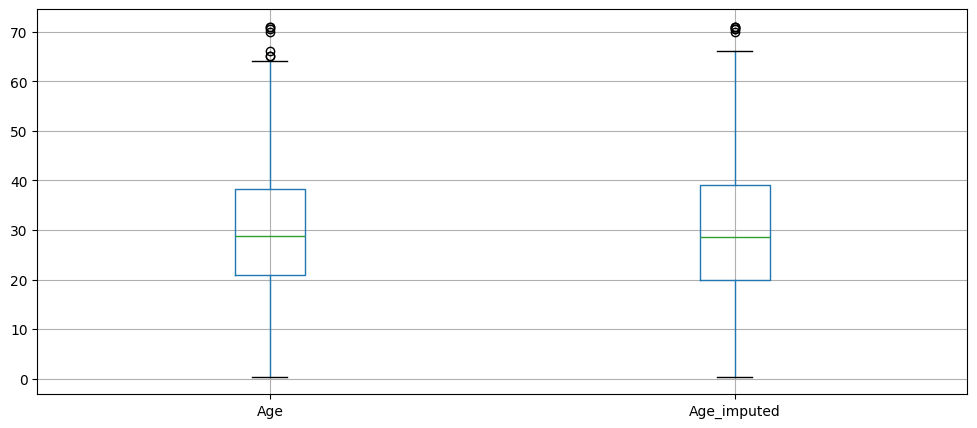

In [135]:
X_train[['Age', 'Age_imputed']].boxplot(figsize=(12, 5))

- It introduce more randomness
- so increase the outliers mores

In [136]:
X_train[X_train['Age'] < 0]

,Age,Fare,Age_imputed


In [137]:
# Dynamic but Repeatable Sampling per Fare

def sample_age_based_on_fare(fare):
    """ Dynamic but Repeatable Sampling per Fare.
    It gives the same value for the same age value.
    If the data is unchanged."""
    seed = int(fare)
    return X_train['Age'].dropna().sample(1, random_state=seed).values[0]

X_train['Sampled_Age'] = X_train['Fare'].apply(sample_age_based_on_fare)
X_train['Sampled_Age']

30     28.0
10     33.0
873     5.0
182    56.0
876     5.0
       ... 
534    34.0
584    34.0
493     4.0
527    54.0
168    29.0
Name: Sampled_Age, Length: 712, dtype: float64

In [138]:
X_train.columns

Index(['Age', 'Fare', 'Age_imputed', 'Sampled_Age'], dtype='object')

In [139]:
# Validate our model is provide the same output for the same fare value 
X_train[(X_train['Age'].isnull()) & (X_train['Fare'] == 0)]

,Age,Fare,Age_imputed,Sampled_Age
633,NaN,0.0,1.0,23.0
815,NaN,0.0,2.0,23.0
277,NaN,0.0,43.0,23.0
413,NaN,0.0,56.0,23.0
674,NaN,0.0,37.0,23.0
466,NaN,0.0,29.0,23.0


In [140]:
X_train[X_train['Age'].isnull()]

,Age,Fare,Age_imputed,Sampled_Age
77,NaN,8.0500,21.0,34.0
868,NaN,9.5000,22.0,5.0
334,NaN,133.6500,34.0,41.0
295,NaN,27.7208,30.0,28.0
792,NaN,69.5500,24.0,49.0
...,...,...,...,...
674,NaN,0.0000,37.0,23.0
466,NaN,0.0000,29.0,23.0
584,NaN,8.7125,19.0,34.0
527,NaN,221.7792,21.0,54.0


# Random imputation in categorical columns

In [141]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [142]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [143]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [144]:
X = data
y = data['SalePrice']

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [146]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [147]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
856,NaN,TA,147000,TA,NaN
468,Gd,TA,250000,TA,Gd
590,NaN,TA,185900,TA,NaN
1386,TA,TA,250000,TA,TA
55,Gd,TA,180500,TA,Gd


In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [149]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [150]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [151]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.655443
TA,0.412439,0.534231
Fa,0.040917,0.054994
Po,0.027823,0.035915
Ex,0.024550,0.030303


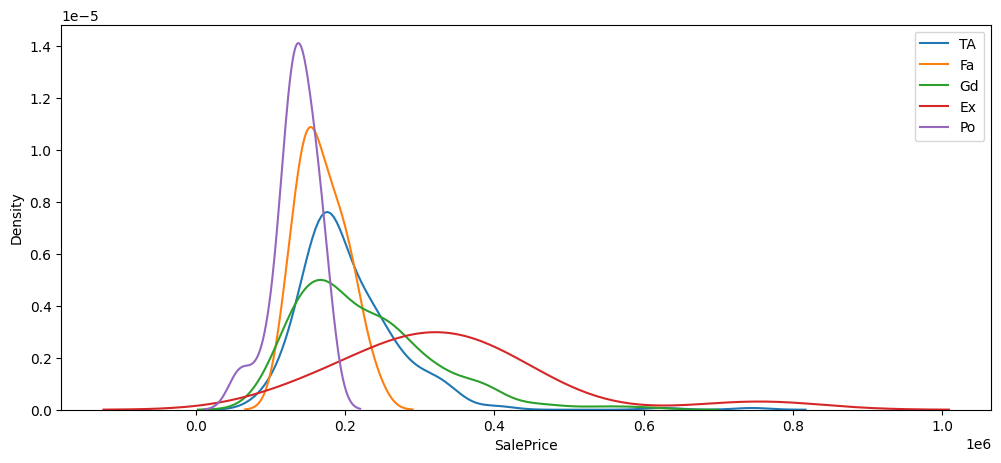

In [162]:
plt.figure(figsize=(12, 5))
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()

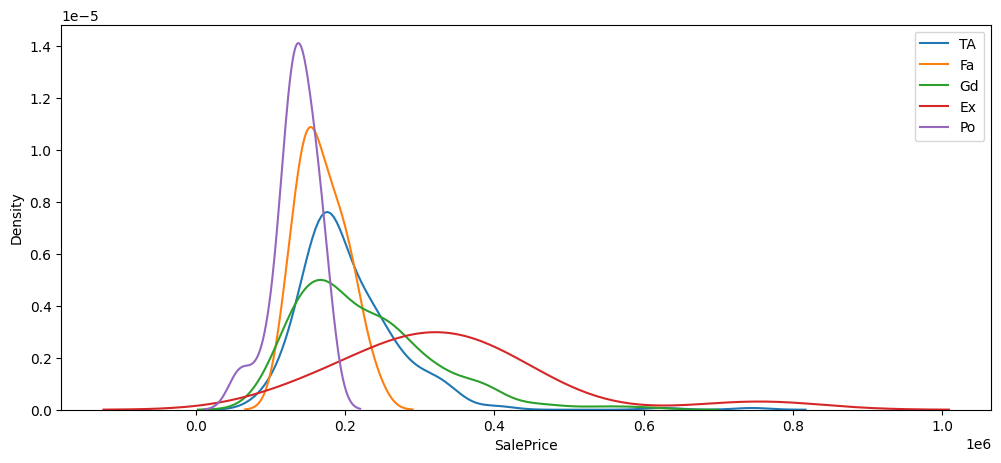

In [166]:
plt.figure(figsize=(12, 5))
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()

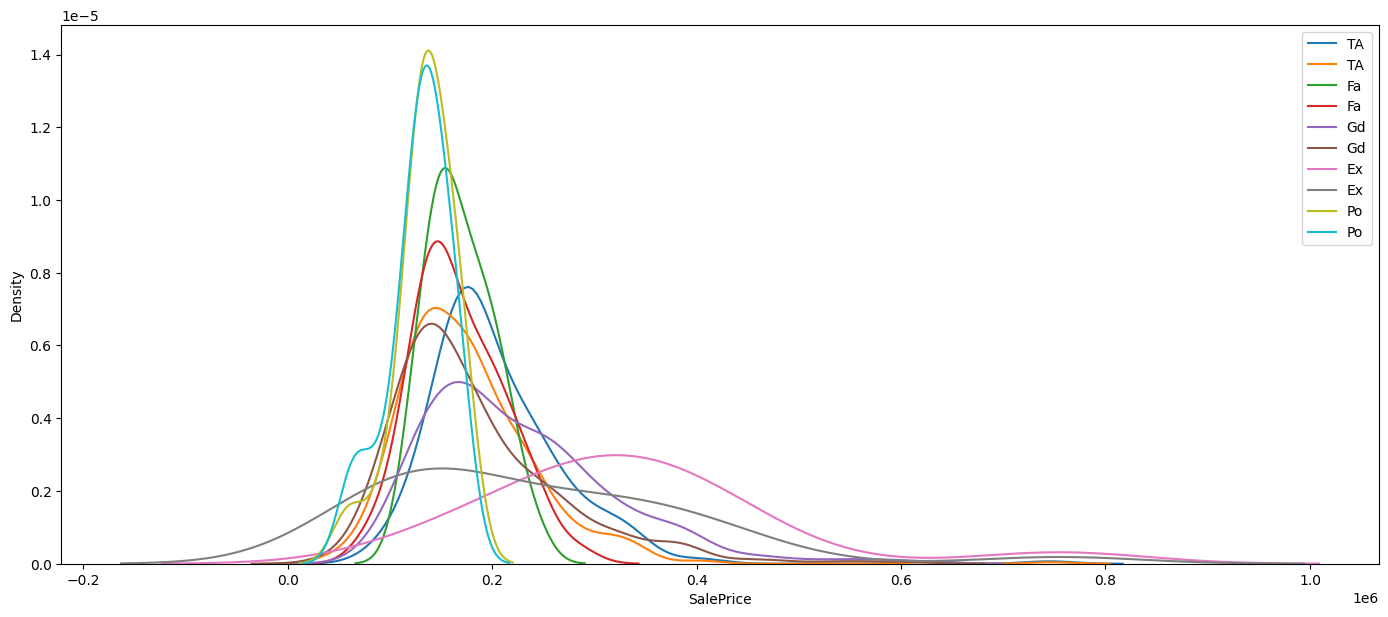

In [165]:
plt.figure(figsize=(17, 7))
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label=category)
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label=category)
plt.legend()
plt.show()